<a href="https://colab.research.google.com/github/KirtanaAryasomyajula/Project-Portfolio/blob/main/EmployeeEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EMPLOYEE EVALUATION FOR PROMOTION**

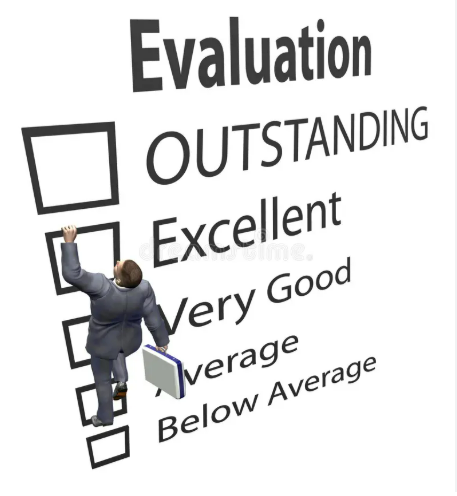

**Objective :**

 To study  the factors like department,age,previous-year-rating,etc which affect the promotion status of an employee in an organization and to predict which kind of  employees will receive promotion.

 Type of Problem: Classification

 Target Variable:Promotion Status(is_prormoted)

**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the dataset**

In [ ]:
df = pd.read_csv('/content/employee_promotion.csv')

**Inspecting first 5 rows**

In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


**Inspecting the datatypes of the features**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


**Inspecting the summaries of the numerical columns**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
awards_won,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,52248.0,63.712238,13.521910,39.0,51.00,60.0,77.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


**Rows and Columns in the data**

In [ ]:
df.shape

(54808, 13)

**Inspecting the null values in the dataset**

In [ ]:
df.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


**Dropping null values**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(46380, 13)

**Dropping 'employee_id' column**

In [ ]:
df = df.drop(columns = 'employee_id')

# Univariate Features

**Region**

<Axes: xlabel='count', ylabel='region'>

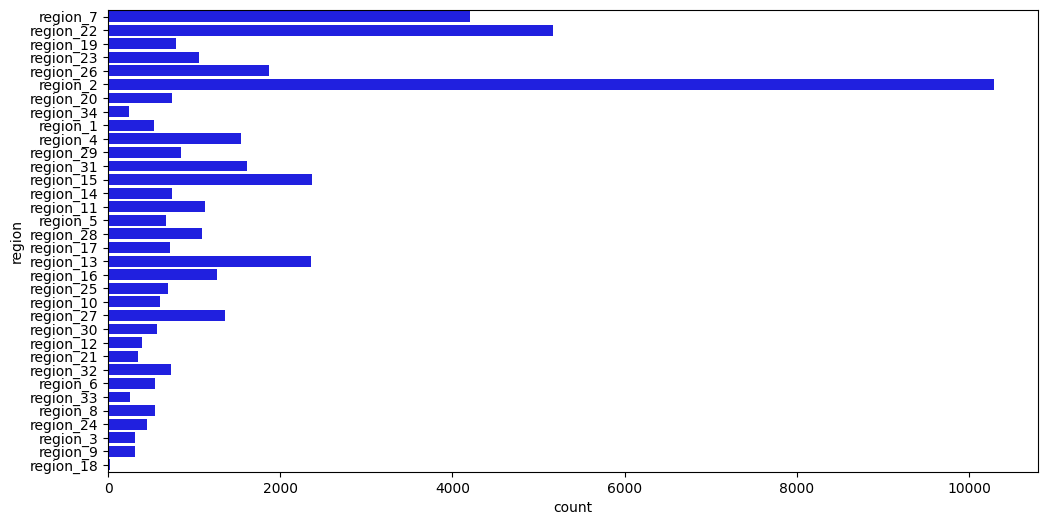

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,y='region',color='blue')

Many employees belong to region_2, followed by region_22 and very few employees belong to region_34.

**Education**

<Axes: ylabel='count'>

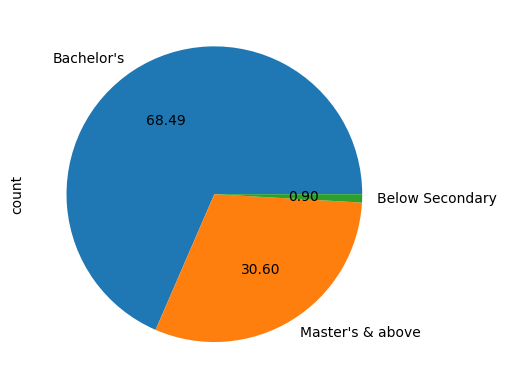

In [ ]:
df['education'].value_counts().plot(kind='pie',autopct='%1.2f')

Most of the employees have completed their Bachelor's degree and very few have attained the education below secondary level.

**Gender**

<Axes: ylabel='count'>

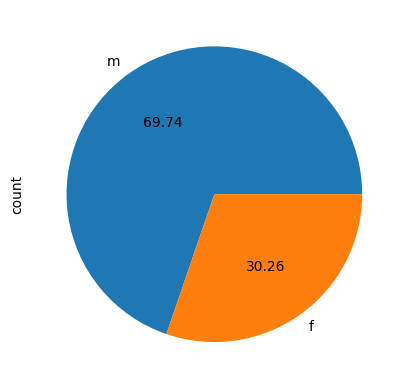

In [ ]:
df['gender'].value_counts().plot(kind='pie',autopct='%1.2f')

The composition of males in the organization is 69.74%.

**Recruitment channel**

<Axes: ylabel='count'>

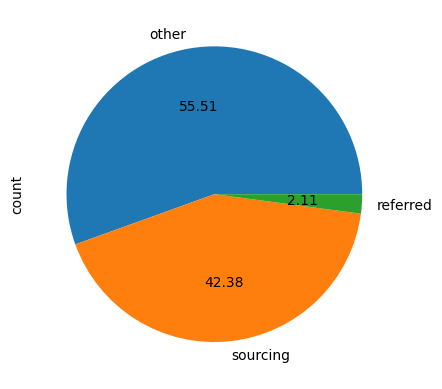

In [ ]:
df['recruitment_channel'].value_counts().plot(kind='pie',autopct='%1.2f')

Over 42% employees are recurited through sourcing and very few(2%) through referrels.

**No of Trainings**

<Axes: xlabel='no_of_trainings'>

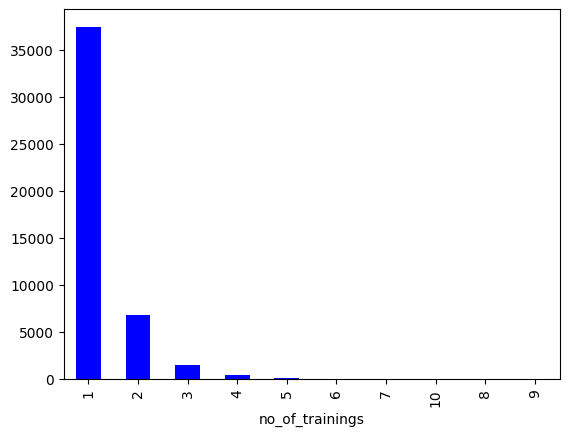

In [ ]:
df['no_of_trainings'].value_counts().plot(kind='bar',color='blue')

Most of the employees went through only one training session.

**Previous year rating**

<Axes: ylabel='previous_year_rating'>

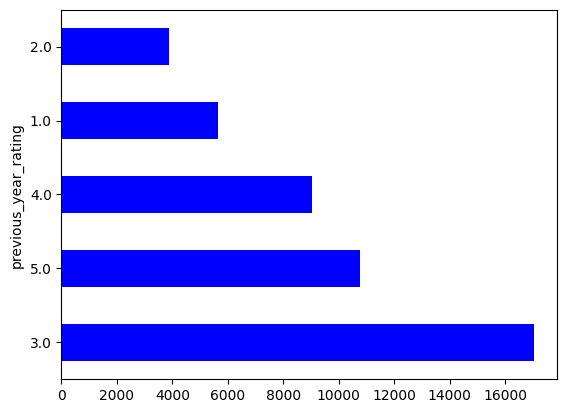

In [ ]:
df['previous_year_rating'].value_counts().plot(kind='barh',color='blue')

Most of the employees have received the average rating of 3 stars in the previous year,followedby 5 stars.

While few employees have received 1 star rating in the previous year.

**Length of service**

<Axes: xlabel='length_of_service'>

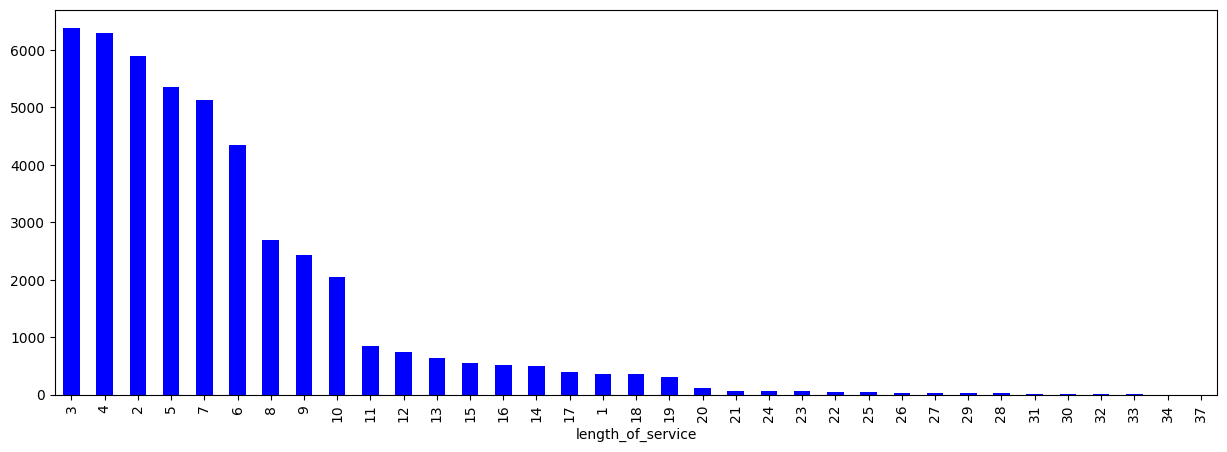

In [ ]:
plt.figure(figsize=(15,5))
df['length_of_service'].value_counts().plot(kind='bar',color='blue')

Many employees have completed 3 years of service.

**Awards won**

<Axes: ylabel='count'>

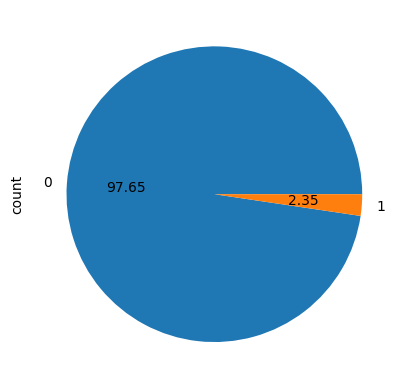

In [ ]:
df['awards_won'].value_counts().plot(kind='pie',autopct='%1.2f')

Very few employees of only 2-3% have won awards.

**Promotion status**

<Axes: ylabel='count'>

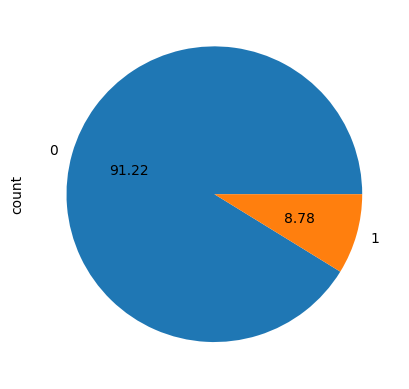

In [ ]:
df['is_promoted'].value_counts().plot(kind='pie',autopct='%1.2f')

About 8.78% of employees have received a promotion.

**Age**

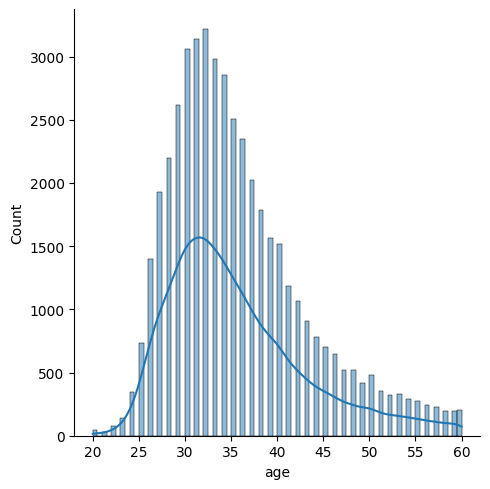

In [ ]:
sns.displot(data=df,x='age',kde=True)

The age feature is rightly skewed.

**Avg-training_score**

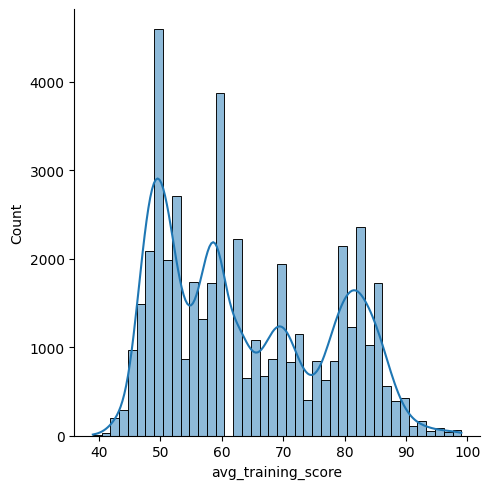

In [ ]:
sns.displot(data=df,x='avg_training_score',kde=True)

avg_training_score is unevenly distributed indicating the presence of outliers.

# BIVARIATE ANALYSIS

**Department vs Promotion Status**

<Axes: xlabel='department', ylabel='count'>

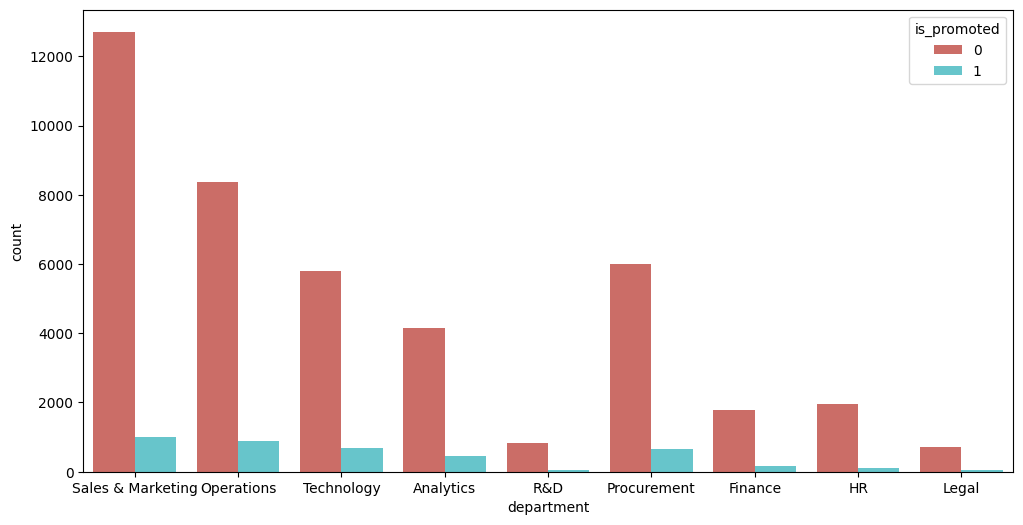

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='department',hue='is_promoted',palette='hls')

Many employees work in Sales & Marketing but the promotions are less when compared to strength of employees in that department, while when compared over all departments , many promotions come from sales&marketing.

Very few employees work in R&D Department.

**Region vs Promotion Status**

<Axes: xlabel='count', ylabel='region'>

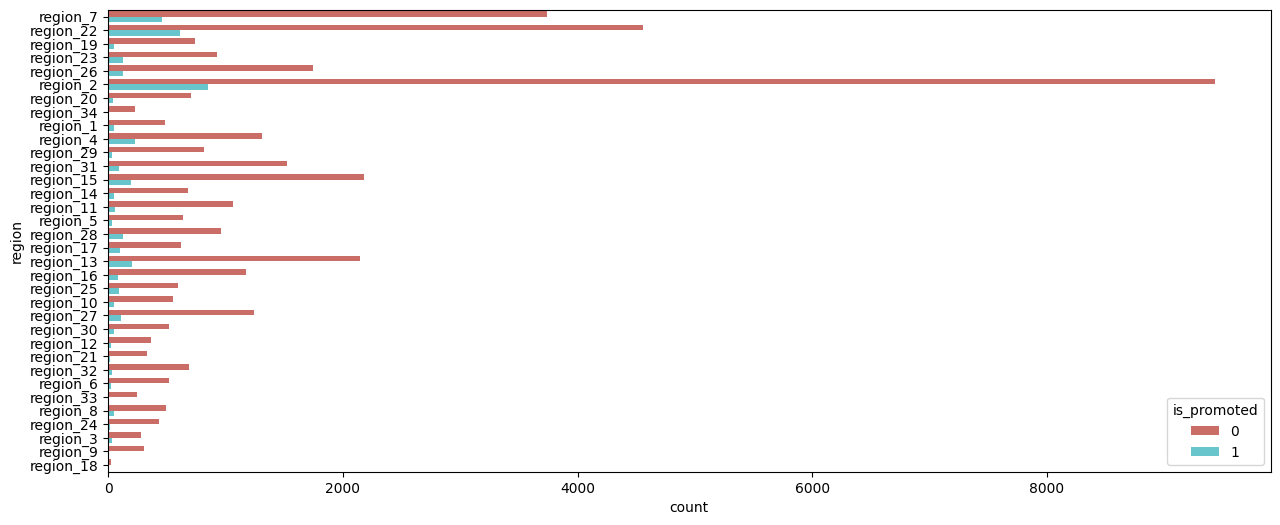

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,y=df['region'],hue='is_promoted',palette='hls')

Many employees who received promotion  belong to region2.

**Education vs Promotion Status**

<Axes: xlabel='education', ylabel='count'>

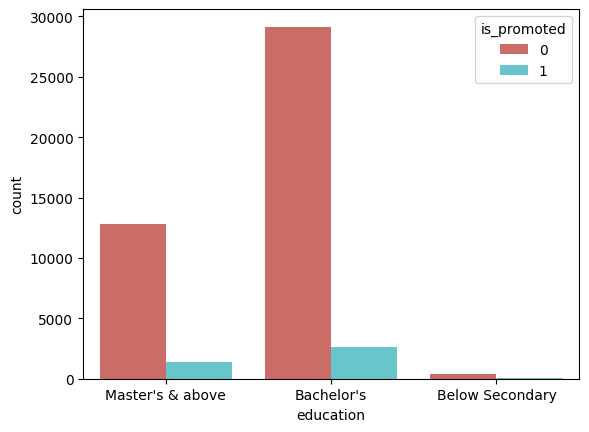

In [ ]:
sns.countplot(data=df,x='education',hue='is_promoted',palette='hls')

Even though there are employees who completed their Master's &above , they received less promotions when compared to those who completed just Bachelor's degree.

**Gender vs Promotion Status**

<Axes: xlabel='gender', ylabel='count'>

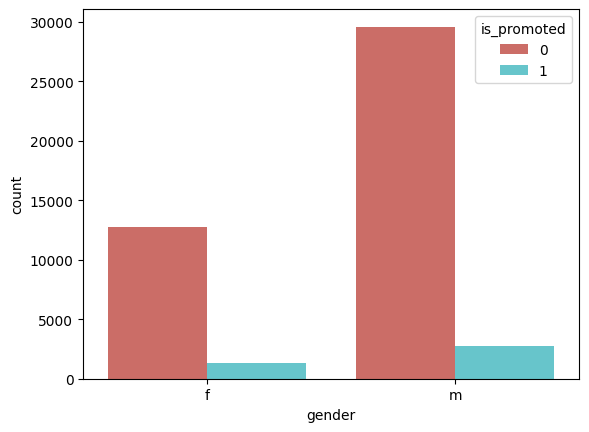

In [ ]:
sns.countplot(data=df,x='gender',hue='is_promoted',palette='hls')

Promotions among male employees is more when compared to females.

**Recruitment channel vs Promotion Status**

<Axes: xlabel='recruitment_channel', ylabel='count'>

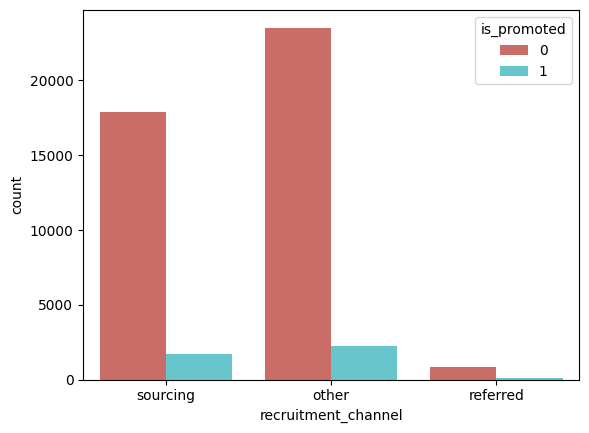

In [ ]:
sns.countplot(data=df,x='recruitment_channel',hue='is_promoted',palette='hls')

Employees recruited through other sources have received more promotions.

**No of trainings vs Promotion Status**

<Axes: xlabel='no_of_trainings', ylabel='count'>

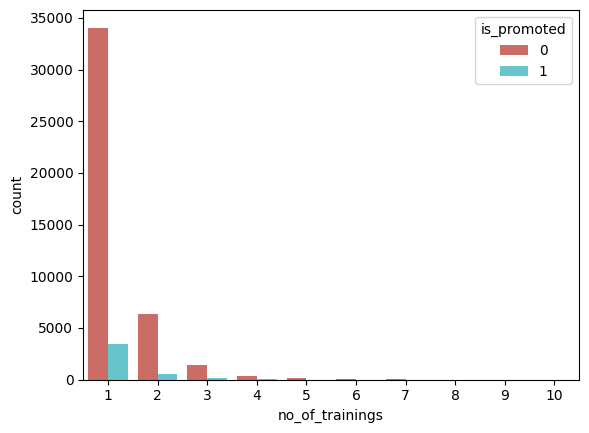

In [ ]:
sns.countplot(data=df,x='no_of_trainings',hue='is_promoted',palette='hls')

**Previous year rating vs Promotion Status**

<Axes: xlabel='previous_year_rating', ylabel='count'>

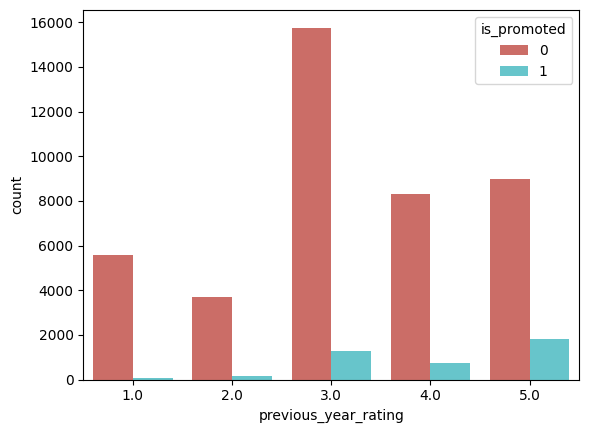

In [ ]:
sns.countplot(data=df,x='previous_year_rating',hue='is_promoted',palette='hls')

Obviously,employees who received 5 star ratings in previous year have received promotions.

**Awards won vs Promotion Status**

<Axes: xlabel='awards_won', ylabel='count'>

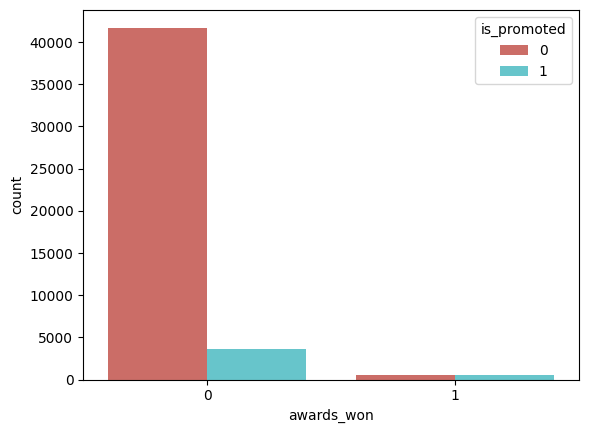

In [ ]:
sns.countplot(data=df,x='awards_won',hue='is_promoted',palette='hls')

Here in contrast, employees who have not won any awards have received promotion when compared to those who received awards.

**Age vs Promotion Status**

<Axes: xlabel='is_promoted', ylabel='age'>

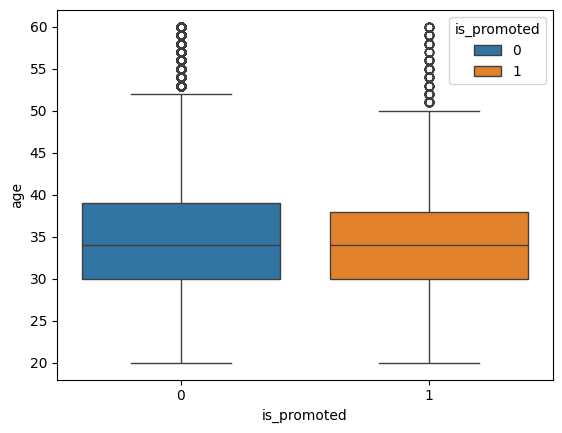

In [ ]:
sns.boxplot(data=df,x='is_promoted',y='age',hue='is_promoted')

Promotion of employees is among employees aged between 30 and 40.

**Length of Service vs Promotion Status**

<Axes: xlabel='is_promoted', ylabel='length_of_service'>

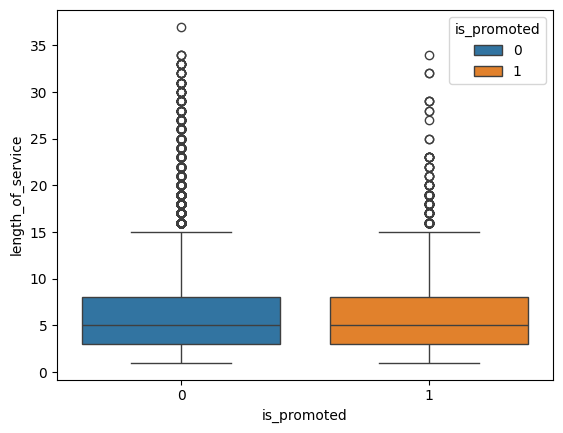

In [ ]:
sns.boxplot(data=df,x='is_promoted',y='length_of_service',hue='is_promoted')

Many employees who completed their 5 years of service have received promotion.

**Training score vs Promotion Status**

<Axes: xlabel='is_promoted', ylabel='avg_training_score'>

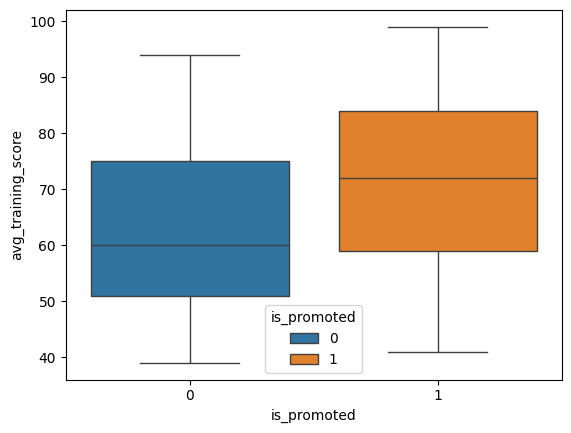

In [ ]:
sns.boxplot(data=df,x='is_promoted',y='avg_training_score',hue='is_promoted')

Employees who received more than an average training score of 70 have received promotions.

**Seperating Numerical and Categorical Columns**

In [ ]:
num_cls = []
for i in df.columns:
  if df.dtypes[i] != 'object':
    num_cls+=[i]
print(num_cls)

['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted']


In [ ]:
cat_cls = []
for i in df.columns:
  if df.dtypes[i] == 'object':
    cat_cls+=[i]
print(cat_cls)

['department', 'region', 'education', 'gender', 'recruitment_channel']


<Axes: >

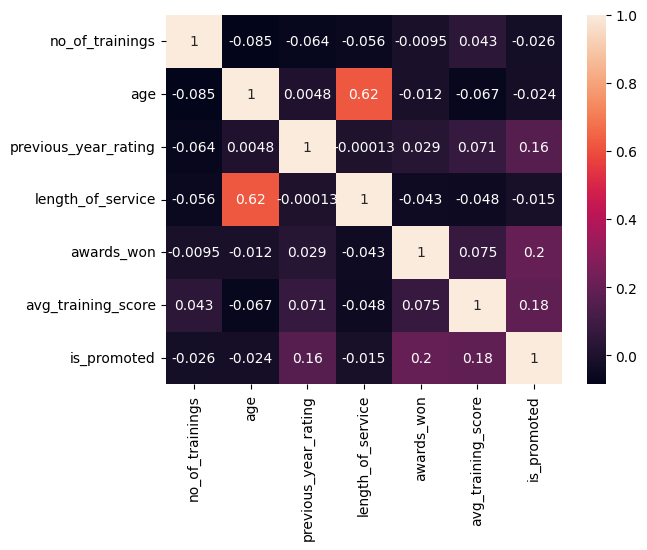

In [ ]:
sns.heatmap(data=df[num_cls].corr(),annot=True)

There is a correlation between age and length_of_service of about 0.62 .

# Feature Engineering

**Encoding categorical features.**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])

In [69]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False)
df['department'] = encoder.fit_transform(df[['department']])
df['region'] = encoder.fit_transform(df[['region']])
df['gender'] = encoder.fit_transform(df[['gender']])
df['recruitment_channel'] = encoder.fit_transform(df[['recruitment_channel']])

In [70]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,0.0,0.0,2,1.0,0.0,1,35,5.0,8,0,49.0,0
1,0.0,0.0,0,0.0,1.0,1,30,5.0,4,0,60.0,0
2,0.0,0.0,0,0.0,0.0,1,34,3.0,7,0,50.0,0
3,0.0,0.0,0,0.0,1.0,2,39,1.0,10,0,50.0,0
4,0.0,0.0,0,0.0,1.0,1,45,3.0,2,0,73.0,0


**Feature Scaling**

In [77]:
from sklearn.preprocessing import RobustScaler

target = 'is_promoted'
scaler = RobustScaler()
feature_columns = [col for col in df.columns if col != target]
df[feature_columns] = scaler.fit_transform(df[feature_columns])


In [78]:
df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,0.0,0.0,1.0,1.0,-1.0,0.0,0.111111,2.0,0.6,0.0,-0.423077,0
1,0.0,0.0,0.0,0.0,0.0,0.0,-0.444444,2.0,-0.2,0.0,0.000000,0
2,0.0,0.0,0.0,0.0,-1.0,0.0,0.000000,0.0,0.4,0.0,-0.384615,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.555556,-2.0,1.0,0.0,-0.384615,0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.222222,0.0,-0.6,0.0,0.500000,0


In [79]:
y = df['is_promoted']
X = df.drop(columns='is_promoted')

# Train-Test-Split

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [81]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37104, 11)
(37104,)
(9276, 11)
(9276,)


# Model Fitting

Since this is a classification problem we can use Logistic Regression,Decision tree and Random Forest algorithms.

In [83]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

lg.fit(X_train,y_train)
y_predict = lg.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_predict))

Accuracy: 0.9154808106942648
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8437
           1       0.81      0.09      0.16       839

    accuracy                           0.92      9276
   macro avg       0.86      0.54      0.56      9276
weighted avg       0.91      0.92      0.88      9276



The model trained using Logistic Regression algorithm has an accuracy of 91% .

# Confusion Matrix

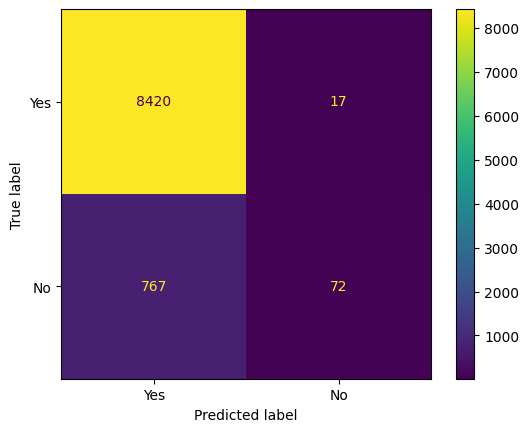

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predict)

class_names = ['Yes', 'No']  # Or whatever your class labels are
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_predict, display_labels=class_names)
plt.show()

In [87]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [89]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8601768003449762
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      8437
           1       0.24      0.25      0.25       839

    accuracy                           0.86      9276
   macro avg       0.58      0.59      0.58      9276
weighted avg       0.86      0.86      0.86      9276



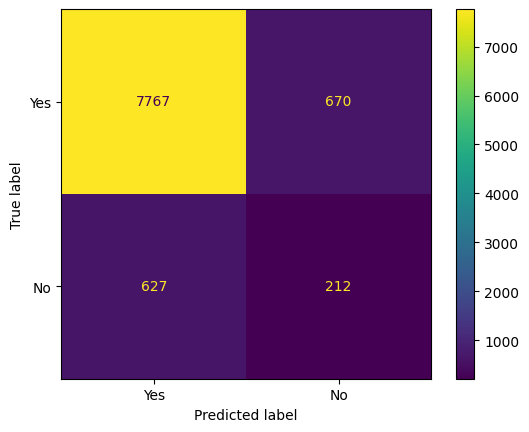

In [90]:
cm = confusion_matrix(y_test, y_pred)

class_names = ['Yes', 'No']  # Or whatever your class labels are
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names)
plt.show()

# Conclusion

•	Logistic Regression outperformed the Decision Tree in this case, offering better generalization and higher accuracy (91%).

•	Decision Tree Classifier achieved 86% accuracy.

•	Target variable (is_promoted) was found to be highly imbalanced, with far fewer promotions so although Logistic Regression has more accuracy, in this case Decision Tree is preferred as hierarchical structure of tree-based model allows it to handle imbalanced datasets better than non-tree-based models.  

**Data Preprocessing**

•	Removed missing values (dropna) and dropped the employee_id column.

•	Encoded categorical features using:

1)LabelEncoder for ordinal data like education.

2)OneHotEncoder for nominal features like department, gender, region.

•	Scaled numerical features using RobustScaler to reduce the impact of outliers.

**Exploratory Data Analysis (EDA)**

•	Visualized distributions with countplots and pie charts.

•	Boxplots highlighted the influence of:

avg_training_score

previous_year_rating

awards_won

•	Target variable (is_promoted) was found to be highly imbalanced, with far fewer promotions.

**Modeling and Evaluation**

•	Logistic Regression:

Achieved 91% accuracy, the best-performing model in the project.

Robust despite the class imbalance and interpretable for stakeholders.

Evaluated using accuracy, classification report (precision, recall, F1-score), and confusion matrix.

•	Decision Tree Classifier:

Achieved 86% accuracy.

Helped visualize decision rules and feature splits.

Good interpretability, but slightly lower generalization performance than logistic regression.

**Conclusion**

•	Logistic Regression outperformed the Decision Tree in this case, offering better generalization and higher accuracy (91%).

